<a href="https://colab.research.google.com/github/tharungajula2/Portfolio/blob/main/CNN_Team13_Kaggle_Musical_Emotions_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objective:

To classify Happy or Sad Emotions in Musical Audio Files using deep learning techniques. Essentially, it is a binary classification framework.

### Problem Statement

To build/develop and implement a deep learning model for the classification of emotional tones between Happy or Sad Emotions in Musical Audio Files dataset.

At the end of this competition, you will be able to:

Load and extract audio features from wave files in the Musical Audio Files dataset using librosa, encompassing MFCC (Mel-Frequency Cepstral Coefficients), Mel spectrogram, and STFT (Short-time Fourier Transform).

Develop a deep learning model utilizing either the Keras or PyTorch deep learning libraries.

### Description:

Dataset Description: The original dataset contains 7 classes but this is just a subset of the original dataset which contains 2 classes. The audio files in the dataset were already preprocessed by converting them into smaller chunks of equal size. All music were divided into 10 seconds smaller chunks using FFMPEG.

The chunks of the same song have the equally spaced names like : Happy20001-Happy20016(Same song) The last two digits resembles the chunk number while the first three digits are the ID of the original song which is provided as the GroupID. The two classes are: 1.)Happy and 2.)Sad


## Grading = 10 Marks

Here is a handy link to Kaggle's competition documentation (https://www.kaggle.com/docs/competitions), which includes, among other things, instructions on submitting predictions (https://www.kaggle.com/docs/competitions#making-a-submission).

### Instructions for downloading train and test data are as follows:

### 1. Create an API key in Kaggle.

To do this, go to the competition site on Kaggle at (https://www.kaggle.com/t/fabdeacc952e424d93059fe06070676a) and click on user then click on your profile as shown below. Click Account.

![alt text](https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Capture-NLP.PNG)

### 2. Next, scroll down to the API access section and click on **Create New Token** to download an API key (kaggle.json).

![alt text](https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Capture-NLP_1.PNG)

### 3. Upload your kaggle.json file using the following snippet in a code cell:



In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tharunkumargajula","key":"fa7a3044f13d9f83504083943d9debfa"}'}

In [ ]:
#If successfully uploaded in the above step, the 'ls' command here should display the kaggle.json file.
%ls

kaggle.json  sample_data/


### 4. Install the Kaggle API using the following command


In [ ]:
!pip install -U -q kaggle==1.5.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.8/118.8 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


### 5. Move the kaggle.json file into ~/.kaggle, which is where the API client expects your token to be located:



In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
#Execute the following command to verify whether the kaggle.json is stored in the appropriate location: ~/.kaggle/kaggle.json
!ls ~/.kaggle

ls: cannot access '/root/.kaggle': No such file or directory


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json #run this command to ensure your Kaggle API token is secure on colab

### 6. Now download the Test Data from Kaggle

**NOTE: If you get a '403 - Not Found' error after running the cell below, it is most likely that the user (whose kaggle.json is uploaded above) has not 'accepted' the rules of the competition and therefore has 'not joined' the competition.**

If you encounter **401-unauthorised** download latest **kaggle.json** by repeating steps 1 & 2

In [ ]:
#If you get a forbidden link, you have most likely not joined the competition.
# !kaggle competitions download -c tone-classification-of-musical-emotion-files
!kaggle competitions download -c tone-classification-of-musical-emotion-files

!unzip tone-classification-of-musical-emotion-files.zip

 99% 636M/641M [00:07<00:00, 122MB/s]
100% 641M/641M [00:07<00:00, 94.1MB/s]
Archive:  tone-classification-of-musical-emotion-files.zip
  inflating: Test/Test/1.wav         
  inflating: Test/Test/10.wav        
  inflating: Test/Test/100.wav       
  inflating: Test/Test/101.wav       
  inflating: Test/Test/102.wav       
  inflating: Test/Test/103.wav       
  inflating: Test/Test/104.wav       
  inflating: Test/Test/105.wav       
  inflating: Test/Test/106.wav       
  inflating: Test/Test/107.wav       
  inflating: Test/Test/108.wav       
  inflating: Test/Test/109.wav       
  inflating: Test/Test/11.wav        
  inflating: Test/Test/110.wav       
  inflating: Test/Test/111.wav       
  inflating: Test/Test/112.wav       
  inflating: Test/Test/113.wav       
  inflating: Test/Test/114.wav       
  inflating: Test/Test/115.wav       
  inflating: Test/Test/116.wav       
  inflating: Test/Test/117.wav       
  inflating: Test/Test/118.wav       
  inflating: Test/Test/119.w

### YOUR CODING STARTS FROM HERE

### Import Neccesary Packages

In [ ]:
# YOUR CODE HERE

In [ ]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

### **Stage 1:** Load the Train data audio files (1 point)




In [ ]:
# YOUR CODE HERE

#### Play the sample audio

In [ ]:
# Function to load audio file
def load_audio_file(file_path):
    audio, sample_rate = librosa.load(file_path, sr=None, mono=True)
    return audio, sample_rate

# Path to the training dataset
train_path = '/content/Train/Train/'

# Load a sample audio file from the Happy folder
sample_file = os.path.join(train_path, 'Happy/Happy41813.wav')  # Adjust the file name as needed

# Load and play the sample audio
audio, sample_rate = load_audio_file(sample_file)
ipd.display(ipd.Audio(audio, rate=sample_rate))


In [ ]:
# YOUR CODE HERE

### **Stage 2:** Data Exploration and Visualization (1 point)


*  Find count of each label and plot bar graph



In [ ]:
# YOUR CODE HERE

In [ ]:
# Checking lengths of all audios
import os
import librosa

def check_audio_lengths(path):
    inconsistent_files = []
    for subdir, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.wav'):
                file_path = os.path.join(subdir, file)
                audio, sample_rate = librosa.load(file_path, sr=None, mono=True)
                length_in_seconds = len(audio) / sample_rate
                if not (9.95 < length_in_seconds < 10.05):  # Small buffer to account for rounding
                    inconsistent_files.append((file_path, length_in_seconds))
    return inconsistent_files

# Path to your dataset
dataset_path = '/content/Train/Train/'
inconsistent_files = check_audio_lengths(dataset_path)
if inconsistent_files:
    print("Found inconsistent files:")
    for file_path, length in inconsistent_files:
        print(f"{file_path}: {length} seconds")
else:
    print("All files are consistently 10 seconds long.")


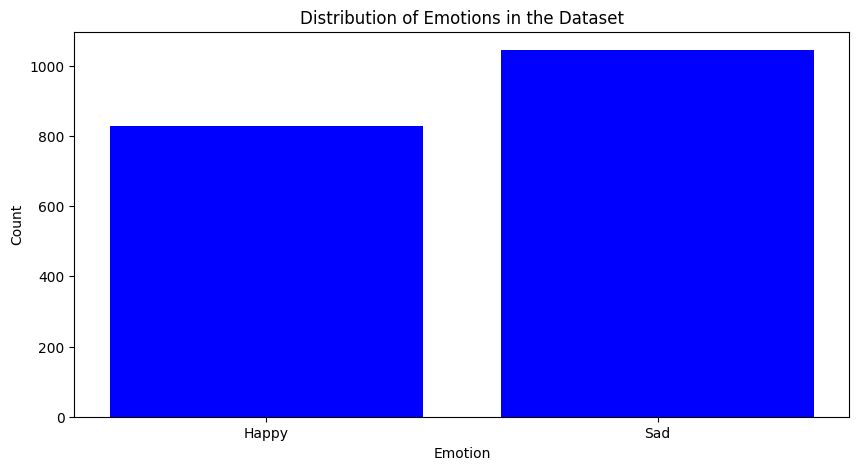

In [ ]:
# Count the occurrences of each label and plot a bar graph
labels = ['Happy', 'Sad']
counts = [len(os.listdir(os.path.join(train_path, label))) for label in labels]

plt.figure(figsize=(10, 5))
plt.bar(labels, counts, color='blue')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Emotions in the Dataset')
plt.show()


#### Visualize sample audio signal using librosa

In [ ]:
# YOUR CODE HERE

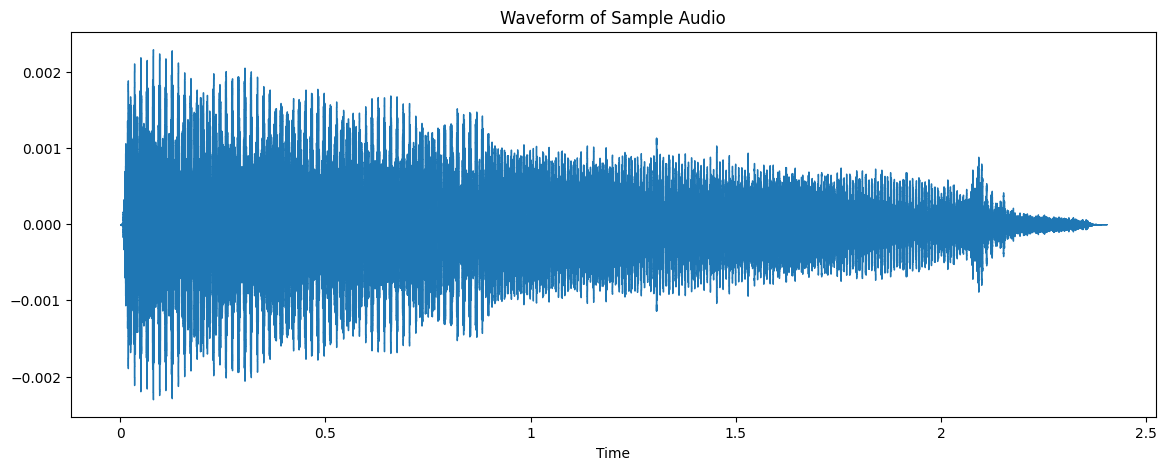

In [ ]:
# Visualize the waveform of the sample audio
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio, sr=sample_rate)
plt.title('Waveform of Sample Audio')
plt.show()

### **Stage 3:** Feature extraction (2 points)


In [ ]:
# YOUR CODE HERE

In [ ]:
# Function to extract features from an audio file
def extract_features(file_name):
    audio, sample_rate = load_audio_file(file_name)
    if audio is None:
        return None

    # Extracting MFCCs
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs = np.mean(mfccs.T, axis=0)

    # Extracting Mel Spectrogram
    mel = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    mel = np.mean(mel.T, axis=0)

    # Extracting STFT
    stft = np.abs(librosa.stft(audio))
    stft = np.mean(stft.T, axis=0)

    return np.hstack((mfccs, mel, stft))

# Create a list to hold feature data and labels
features = []
labels = []

# Iterate over all the audio files in the training dataset
for emotion in ['Happy', 'Sad']:
    for file_name in glob.glob(os.path.join(train_path, emotion, '*.wav')):
        feature_vector = extract_features(file_name)
        if feature_vector is not None:
            features.append(feature_vector)
            labels.append(emotion)

# Convert to DataFrame
features_df = pd.DataFrame(features)
labels_df = pd.DataFrame(labels, columns=['label'])

# Combine features and labels
dataset_df = pd.concat([features_df, labels_df], axis=1)

print(dataset_df.head())

            0           1         2          3          4          5  \
0 -253.236786  184.747787  2.024332  13.057034  19.815395  23.572407   
1 -151.531372  140.124252  6.510349  17.025171   6.214468  19.268267   
2 -238.824631  155.191895 -3.555800  39.346527   8.540112  13.905626   
3 -261.808624  190.512817  5.821606  13.322280 -13.344962   1.883405   
4 -388.204865  212.378372 -3.494463   0.612560  25.457474  -7.188211   

           6         7          8          9  ...      1184      1185  \
0   4.610891  9.457561  21.410963  24.522633  ...  0.000274  0.000268   
1   0.253044  7.898739  -4.334332   7.307672  ...  0.000259  0.000267   
2   3.576273  1.927138   8.205076   0.438014  ...  0.000524  0.000520   
3 -10.520792  0.335634  -8.002136  -1.030943  ...  0.000285  0.000286   
4 -11.921310 -0.562133  -3.795521  -7.239860  ...  0.000267  0.000264   

       1186      1187      1188      1189      1190      1191      1192  label  
0  0.000286  0.000303  0.000310  0.000371  0.00

### **Stage 4:** Train the model  (4 points)


In [ ]:
# YOUR CODE HERE

In [ ]:
# Preprocessing data for Keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(labels)
y_categorical = to_categorical(y_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, y_categorical, test_size=0.2, random_state=42)

# Reshaping data for CNN
import numpy as np

# Reshape features for CNN input
X_train = np.array(X_train).reshape(len(X_train), -1, 1, 1)
X_test = np.array(X_test).reshape(len(X_test), -1, 1, 1)

# Building the CNN model using Keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

input_shape = (X_train.shape[1], 1, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 1), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Conv2D(64, (3, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Conv2D(128, (3, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/20
47/47 [==============================] - 8s 134ms/step - loss: 1.3187 - accuracy: 0.6262 - val_loss: 0.6001 - val_accuracy: 0.6533
Epoch 2/20
47/47 [==============================] - 6s 131ms/step - loss: 0.5745 - accuracy: 0.7109 - val_loss: 0.5237 - val_accuracy: 0.7707
Epoch 3/20
47/47 [==============================] - 7s 142ms/step - loss: 0.5232 - accuracy: 0.7470 - val_loss: 0.4545 - val_accuracy: 0.8027
Epoch 4/20
47/47 [==============================] - 6s 118ms/step - loss: 0.4754 - accuracy: 0.7704 - val_loss: 0.4258 - val_accuracy: 0.7920
Epoch 5/20
47/47 [==============================] - 8s 168ms/step - loss: 0.4445 - accuracy: 0.7877 - val_loss: 0.3908 - val_accuracy: 0.8107
Epoch 6/20
47/47 [==============================] - 6s 124ms/step - loss: 0.4198 - accuracy: 0.8211 - val_loss: 0.4673 - val_accuracy: 0.7787
Epoch 7/20
47/47 [==============================] - 7s 160ms/step - loss: 0.4113 - accuracy: 0.8131 - val_loss: 0.3569 - val_accuracy: 0.8533
Epoch 

### **Stage 5:** Kaggle Testset predictions (2 points)



*   Load the test set and extract the features of the .wav files
*   Using the trained model get the predicions on the test set
*   Finally, upload your predictions to the kaggle



In [ ]:
# YOUR CODE HERE

In [ ]:
# Define the path to the test data
test_path = '/content/Test/Test/'

# Function to extract features from the test data
def extract_test_features(test_path):
    test_features = []
    file_names = []

    for file_name in glob.glob(os.path.join(test_path, '*.wav')):
        feature_vector = extract_features(file_name)
        if feature_vector is not None:
            test_features.append(feature_vector)
            file_names.append(os.path.basename(file_name))

    return test_features, file_names

# Extract features and file names from the test data
test_features, test_file_names = extract_test_features(test_path)

# Convert to NumPy array and reshape for the model
X_test = np.array(test_features).reshape(len(test_features), -1, 1, 1)

# Predict labels for the test data
predictions = model.predict(X_test)

# Decode the predictions
predicted_labels = le.inverse_transform(np.argmax(predictions, axis=1))

# Create a DataFrame with file names and predicted labels
submission_df = pd.DataFrame({
    'File Name': test_file_names,
    'Target': predicted_labels
})

# Save the DataFrame to a CSV file
submission_file = '/content/submission.csv'
submission_df.to_csv(submission_file, index=False)

# Download the submission file
from google.colab import files
files.download(submission_file)
